In [123]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [124]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))


3616

In [125]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))


10192

In [126]:
img = cv.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-10.png')

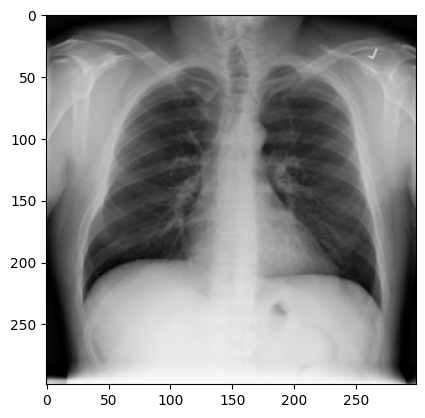

In [127]:
plt.imshow(img);

In [128]:
img.shape

(299, 299, 3)

In [129]:
df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [130]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [131]:
urls = os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [132]:
path = "COVID-19_Radiography_Dataset/COVID/images/" + urls[0]

In [133]:
path

'COVID-19_Radiography_Dataset/COVID/images/COVID-1.png'

In [134]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv.imread(img_path)
    img = img / 255.0
    img = cv.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [135]:
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [136]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [137]:
normal_path = "COVID-19_Radiography_Dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [138]:
covidImages.shape

(3616, 100, 100, 3)

In [139]:
normalImages.shape

(10192, 100, 100, 3)

In [140]:
data = np.r_[covidImages, normalImages]

In [141]:
targets = np.r_[covidTargets, normalTargets]

In [142]:
targets.shape

(13808,)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [144]:
model=Sequential ( )

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,3) ,activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense (units=512, activation='relu'))
model.add(Dense (units=256, activation='relu'))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

In [145]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 49, 49, 32)        0         


 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 10, 10, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               819712    
          

In [146]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [147]:
history=model.fit(X_train, y_train, epochs=5,batch_size=32,validation_data=(X_test, y_test))

Epoch 1/5
324/324 [==============================] - 74s 224ms/step - loss: 0.3958 - accuracy: 0.8205 - val_loss: 0.2921 - val_accuracy: 0.8763
Epoch 2/5
324/324 [==============================] - 75s 230ms/step - loss: 0.2554 - accuracy: 0.8915 - val_loss: 0.2151 - val_accuracy: 0.9099
Epoch 3/5
324/324 [==============================] - 87s 268ms/step - loss: 0.2052 - accuracy: 0.9143 - val_loss: 0.2171 - val_accuracy: 0.9087
Epoch 4/5
324/324 [==============================] - 80s 247ms/step - loss: 0.1683 - accuracy: 0.9346 - val_loss: 0.1653 - val_accuracy: 0.9305
Epoch 5/5
324/324 [==============================] - 86s 265ms/step - loss: 0.1417 - accuracy: 0.9447 - val_loss: 0.1393 - val_accuracy: 0.9464


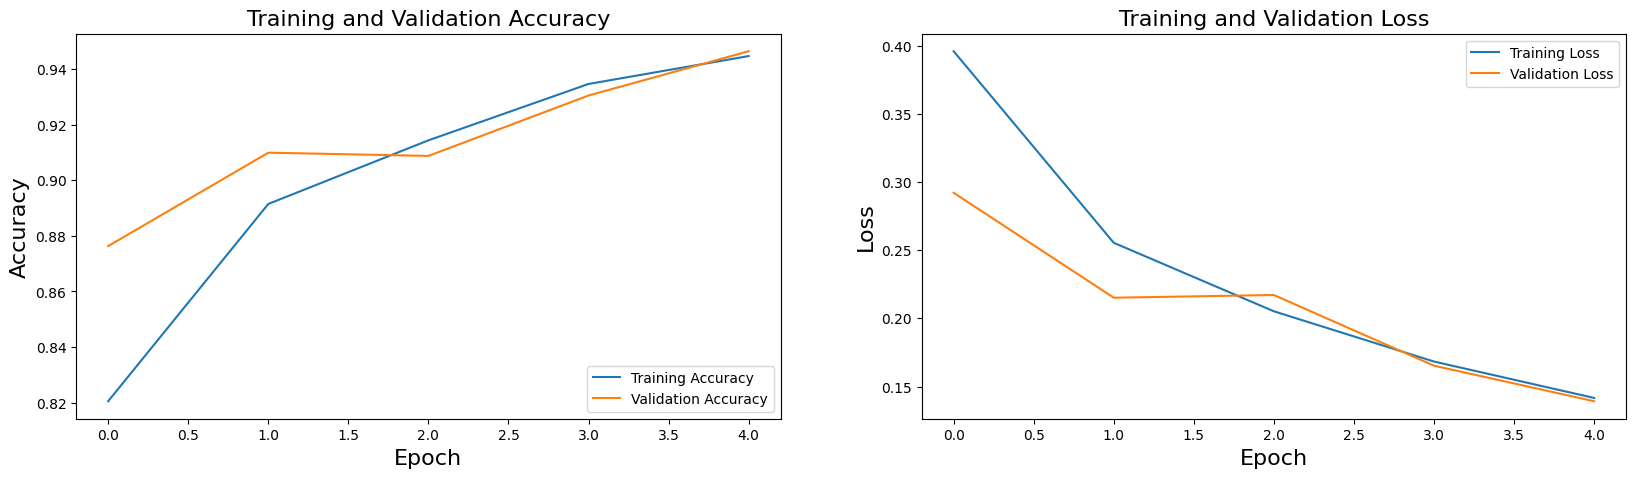

In [148]:
#Accuracy Grafiği
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.title("Training and Validation Accuracy",fontsize=16)

#Loss Grafiği
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.title("Training and Validation Loss",fontsize=16)
plt.show()

In [149]:
waste_labels={0:"Normal",1:"COVID"}

In [150]:
def model_testing(path):
    img = image.load_img(path, target_size=(100, 100, 3))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img) / 255
    p = model.predict(img.reshape(1, 100, 100, 3))
    predicted_class = 1 if p[0] > 0.5 else 0  # Tahmin için sigmoid çıktısını eşikle

    return img, p, predicted_class

In [151]:
img, p, predicted_class = model_testing("C:/Users/YavuzARSLAN/Desktop/VS/Chest Xray Classification Using CNN/yavuz_akciger_deneme.png")
img1, p1, predicted_class1 = model_testing("C:/Users/YavuzARSLAN/Desktop/VS/Chest Xray Classification Using CNN/covid.png")

1/1 [==============================] - 0s 29ms/step


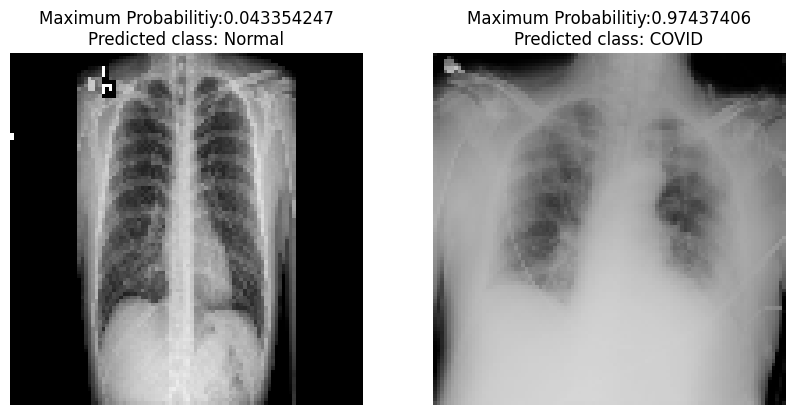

In [152]:
plt.figure(figsize=(10, 30))

plt.subplot(121)
plt.axis("off")
plt.imshow(img.squeeze())
plt.title("Maximum Probabilitiy:"+str(np.max(p[0],axis=-1))+"\n"+"Predicted class: " +waste_labels[predicted_class])

plt.subplot(122)
plt.axis("off")
plt.imshow(img1.squeeze())
plt.title("Maximum Probabilitiy:"+str(np.max(p1[0],axis=-1))+"\n"+"Predicted class: " +waste_labels[predicted_class1])

plt.show()